In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
!pip install mlxtend


In [89]:
df = pd.read_csv('placement.csv')

In [90]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [91]:
df.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [92]:
df.astype

<bound method NDFrame.astype of     Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0          0
2            2   5.3  121.0          0
3            3   7.4  132.0          1
4            4   5.8  142.0          0
..         ...   ...    ...        ...
95          95   4.3  200.0          0
96          96   4.4   42.0          0
97          97   6.7  182.0          1
98          98   6.3  103.0          1
99          99   6.2  113.0          1

[100 rows x 4 columns]>

In [93]:
df.size

400

In [94]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [95]:
df.sample(7)

,Unnamed: 0,cgpa,iq,placement
69,69,8.5,120.0,1
13,13,6.4,116.0,1
35,35,6.8,90.0,1
10,10,6.0,45.0,1
59,59,4.8,112.0,0
56,56,6.1,65.0,0
80,80,4.9,196.0,0


In [96]:
df.shape


(100, 4)

In [97]:
df = df.iloc[:,1:]


In [98]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


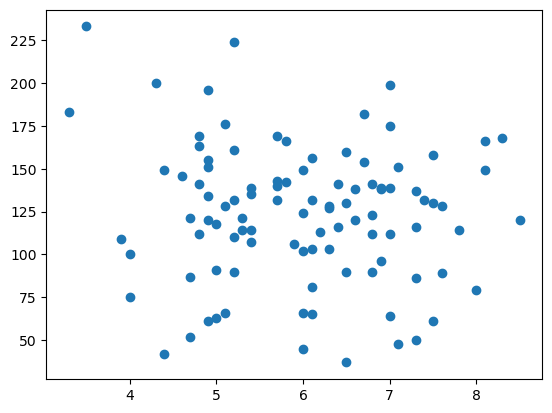

In [99]:
plt.scatter(df['cgpa'],df['iq'])


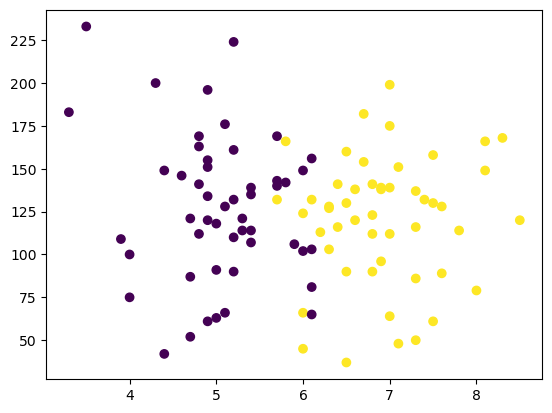

In [100]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])


In [101]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [102]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [103]:
y.shape
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split
train_test_split(X,y,test_size=0.2)

[    cgpa     iq
 24   4.7  121.0
 36   5.7  140.0
 29   7.0  112.0
 53   8.3  168.0
 76   4.9  155.0
 ..   ...    ...
 18   4.0  100.0
 67   5.0  118.0
 57   6.5  130.0
 86   5.1  128.0
 99   6.2  113.0
 
 [80 rows x 2 columns],
     cgpa     iq
 38   6.5  160.0
 5    7.1   48.0
 54   6.4  141.0
 97   6.7  182.0
 26   7.0  199.0
 43   6.8  141.0
 32   7.0  139.0
 21   7.1  151.0
 95   4.3  200.0
 0    6.8  123.0
 72   7.3  116.0
 52   7.0  175.0
 44   7.5   61.0
 35   6.8   90.0
 31   3.9  109.0
 33   6.0  149.0
 88   4.4  149.0
 71   6.1  132.0
 47   5.2  161.0
 90   7.3   86.0,
 24    0
 36    0
 29    1
 53    1
 76    0
      ..
 18    0
 67    0
 57    1
 86    0
 99    1
 Name: placement, Length: 80, dtype: int64,
 38    1
 5     1
 54    1
 97    1
 26    1
 43    1
 32    1
 21    1
 95    0
 0     1
 72    1
 52    1
 44    1
 35    1
 31    0
 33    0
 88    0
 71    1
 47    0
 90    1
 Name: placement, dtype: int64]

In [105]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [106]:
X_train


,cgpa,iq
17,3.3,183.0
71,6.1,132.0
65,8.1,166.0
2,5.3,121.0
66,6.9,96.0
...,...,...
59,4.8,112.0
68,4.0,75.0
36,5.7,140.0
28,5.2,90.0


In [107]:
y_train


17    0
71    1
65    1
2     0
66    1
     ..
59    0
68    0
36    0
28    0
63    1
Name: placement, Length: 80, dtype: int64

In [108]:
X_test


,cgpa,iq
57,6.5,130.0
72,7.3,116.0
95,4.3,200.0
56,6.1,65.0
32,7.0,139.0
79,6.5,90.0
41,5.4,114.0
50,3.5,233.0
91,7.5,158.0
53,8.3,168.0


In [109]:
from sklearn.preprocessing import StandardScaler


In [110]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-2.42904032,  1.67093633],
       [ 0.09815444,  0.31288449],
       [ 1.90329355,  1.21825238],
       [-0.62390121,  0.01997135],
       [ 0.82021009, -0.64574033],
       [ 0.1884114 , -0.19305639],
       [ 0.91046704, -0.21968486],
       [ 0.72995313, -0.21968486],
       [ 0.45918226,  1.05848158],
       [-1.88749859, -0.29957026],
       [-0.53364425,  0.39276989],
       [ 0.00789748, -0.48596953],
       [ 0.72995313,  0.07322829],
       [ 1.63252269, -0.16642792],
       [-0.98492903,  0.92533924],
       [-0.98492903, -1.57773669],
       [ 0.00789748,  0.76556844],
       [-0.80441512,  1.48453706],
       [-0.98492903,  0.81882537],
       [ 1.36175182,  0.25962756],
       [ 0.27866835, -0.45934106],
       [ 0.91046704,  1.45790859],
       [-0.53364425, -0.35282719],
       [-1.79724163, -0.53922647],
       [ 0.36892531,  0.5525407 ],
       [-1.43621381,  0.76556844],
       [ 0.00789748, -2.00379217],
       [-0.71415816,  0.31288449],
       [ 0.82021009,

In [111]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.45918226,  0.25962756],
       [ 1.18123791, -0.11317099],
       [-1.52647076,  2.12362028],
       [ 0.09815444, -1.47122283],
       [ 0.91046704,  0.49928376],
       [ 0.45918226, -0.80551114],
       [-0.53364425, -0.16642792],
       [-2.24852641,  3.0023597 ],
       [ 1.36175182,  1.00522465],
       [ 2.08380747,  1.27150932],
       [-0.89467207, -1.52447976],
       [-0.89467207, -0.05991405],
       [ 0.36892531, -0.11317099],
       [ 0.82021009,  0.4726553 ],
       [-0.89467207, -0.77888267],
       [-0.71415816,  2.76270349],
       [-0.26287338,  0.60579763],
       [-1.07518598,  1.29813779],
       [-0.62390121, -0.16642792],
       [ 1.90329355,  0.76556844]])

In [112]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [113]:
clf.fit(X_train,y_train)

LogisticRegression()

In [114]:
y_pred = clf.predict(X_test)


In [115]:
y_test

57    1
72    1
95    0
56    0
32    1
79    1
41    0
50    0
91    1
53    1
7     0
67    0
13    1
11    1
25    0
16    0
6     0
75    0
46    0
37    1
Name: placement, dtype: int64

In [116]:
from sklearn.metrics import accuracy_score


In [117]:
accuracy_score(y_test,y_pred)


0.95

<Axes: >

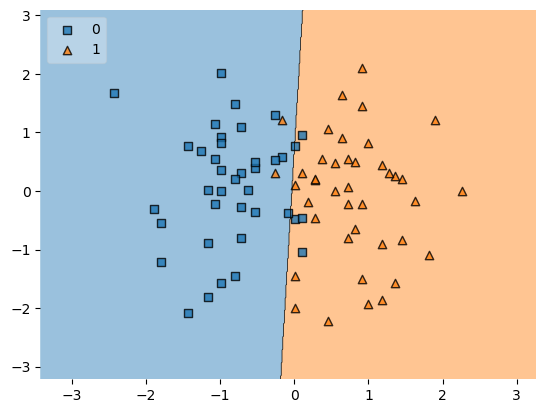

In [118]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)